# Курсовая работа

### Выполнил студент группы БФИ2202 Сахарова А.М.

### Задание
Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.  
 Данные в файле содержатся в следующем формате:

| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в общей выручке.  
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.  
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

### Код программы :

### Хэш таблица для дальнейшей работы 

In [1]:
# O(1)
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
    
    def hash_function(self, key):
        return key % self.size
    
    def insert(self, key, value):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [(key, value)]
        else:
            self.table[index].append((key, value))
    
    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            values = []
            for value in self.table[index]:
                values.append(value[1])
            return values  
        return None  

### Быстрая сортировка

In [2]:
# O(log n)
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

### Создание ф-ции для считвания данных

In [3]:
import csv
import pandas as pd

def read_csv():
    data = []
    try:
        with open("заказы.csv", 'r', encoding="utf-8", newline="") as file:
            csv_reader = csv.reader(file)
            next(csv_reader) #пропускаем заголовок
            for line in csv_reader:
                data.append(line)
        return data
    except:
        print('Не удалось прочитать файл')

def pd_read_csv():
    try:
        data = pd.read_csv('заказы.csv')
        return data
    except:
        print('Не удальсо прочитать файл с помощью pandas')


### Класс для работы с csv файлом

In [4]:
import pandas as pd
import IPython.display as ip

class serch_in_CSV:

    def __init__(self, data):
        self.data = data

    def store_revenue(self):
        count=0
        for product in self.data: 
            count += int(product[-1])
            
        return count
    
    def popular_product(self):
        max = int(self.data[0][4])
        for product in self.data:
            item = int(product[4])
            if item > max:
                max = item
        dict = HashTable(max + 1)
        for product in self.data:
            item = int(product[4])
            dict.insert(item, product[2])
        
        return dict.search(max)
    
    def expensive_product(self):
        max = int(self.data[0][6])
        for product in self.data:
            item = int(product[6])
            if item > max:
                max = item
        dict = HashTable(max + 1)
        for product in self.data:
            item = int(product[6])
            dict.insert(item, product[2])
        
        return dict.search(max)
    
    def percenntage_product(self):
        part = []
        sum_cost = self.store_revenue()
        for product in self.data:
           part.append(round(int(product[6])/sum_cost, 5))

        return part
    

pd_data = pd_read_csv()
names = pd_data['Название товара']
data = read_csv()
csv_service = serch_in_CSV(data)
revenue = csv_service.store_revenue()
popular_pr = csv_service.popular_product()
high_price_pr = csv_service.expensive_product()
percent_for_pr = csv_service.percenntage_product()

row = {
    'Общая выручка': revenue,
    'Популярный продукт': popular_pr,
    'Товар с наибольшей выручкой': high_price_pr,
}

table = {
    'Название товара': names,
    'Доля каждого товара': percent_for_pr,
}


table_looks = pd.DataFrame(table)
row_looks= pd.DataFrame(row)
ip.display(table_looks)
ip.display(row_looks)


,Название товара,Доля каждого товара
0,Доберман,0.15340
1,Бигль,0.03409
2,Мэйн-кун,0.14999
3,Шпиц,0.03579
4,Волнистый попугай,0.01534
5,Алабай,0.09545
6,Ара,0.07500
7,Манчкин,0.07159
8,Сфинкс,0.04261
9,Сиба-ину,0.07755


,Общая выручка,Популярный продукт,Товар с наибольшей выручкой
0,5867000,Корги,Корги


### Работа с отчетом

,Общая выручка всего магазина: 5867000


,Название товара,Количество продаж,Доля каждого товара
0,Доберман,10,0.15340
1,Бигль,5,0.03409
2,Мэйн-кун,8,0.14999
3,Шпиц,7,0.03579
4,Волнистый попугай,9,0.01534
5,Алабай,8,0.09545
6,Ара,4,0.07500
7,Манчкин,7,0.07159
8,Сфинкс,5,0.04261
9,Сиба-ину,7,0.07755


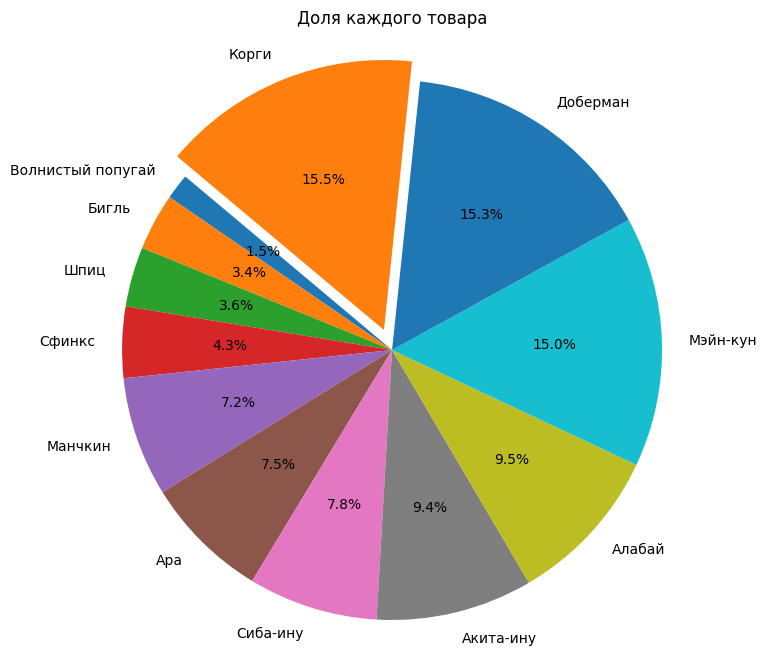

In [5]:
import pandas as pd
import IPython.display as ip
import matplotlib.pyplot as plt


data = pd_read_csv()
names = data['Название товара']
number_sales = data ['Количество продаж']
sercher = serch_in_CSV(read_csv())
part = sercher.percenntage_product()
revenue = sercher.store_revenue()

table = {
    'Название товара': names,
    'Количество продаж': number_sales,
    'Доля каждого товара': part,
}

revenue_str = str(revenue)

row = {
    'Общая выручка всего магазина: ' + revenue_str: []
}

table_looks = pd.DataFrame(table)
row_looks = pd.DataFrame(row)
ip.display(row_looks)
ip.display(table_looks)

product_names = data['Название товара']
sizes = sercher.percenntage_product()

dict = {}
for i in range(len(sizes)):
    dict[sizes[i]] = product_names[i]

sorted_sizes = quicksort(sizes)
sorted_names = []

for i in range(len(sorted_sizes)):
    sorted_names.append(dict[sorted_sizes[i]])



plt.figure(figsize=(9, 8))
explode = [0] * (len(sorted_names) - 1) + [0.08]

plt.pie(sorted_sizes, labels=sorted_names, autopct='%1.1f%%', explode=explode, startangle=140)

plt.axis('equal')

plt.title('Доля каждого товара')

plt.show()



In [6]:
import pandas as pd
import IPython.display as ip
import matplotlib.pyplot as plt

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    result = []

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            # Найден элемент, теперь ищем границы диапазона
            left = mid
            right = mid
            while left > 0 and arr[left - 1] == target:
                left -= 1
            while right < len(arr) - 1 and arr[right + 1] == target:
                right += 1
            # Добавляем найденный диапазон в результат
            result.extend(range(left, right + 1))
            return result
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return "Элемент не найден"




data = pd_read_csv()

categories = data['Категория товара']
categories_dict = {}

for i in range(len(categories)):
    categories_dict[i] = categories[i]

array = quicksort(categories)
target = 'Кошка'
searched = binary_search(array, target) # O(log n)

indexes = []
for key in range(len(categories_dict)):
    if categories_dict[key] == target:
        indexes.append(key)

csv_data = read_csv()
categories_data = []

for i in indexes:
    categories_data.append(csv_data[i])

categories_data.insert(0, ['Номер', "Дата", "Название", "Категория", "Количество", "Стоимость", "Общая стоимость"])
df = pd.DataFrame(categories_data)
display(df)


,0,1,2,3,4,5,6
0,Номер,Дата,Название,Категория,Количество,Стоимость,Общая стоимость
1,003,2022-05-03,Мэйн-кун,Кошка,8,110000,880000
2,008,2022-05-12,Манчкин,Кошка,7,60000,420000
3,009,2022-05-17,Сфинкс,Кошка,5,50000,250000
